In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
%matplotlib inline
import seaborn as sn
sn.set_style('whitegrid')

In [2]:
stock=pd.read_csv("C:/Users/Adisai/Downloads/Google_Stock_Price_Train.csv",index_col="Date",parse_dates=True)

In [3]:
stock.head()# if use head method we will get first   values

,Open,High,Low,Close,Volume
Date,,,,,
2012-01-03,325.25,332.83,324.97,663.59,"7,380,500"
2012-01-04,331.27,333.87,329.08,666.45,"5,749,400"
2012-01-05,329.83,330.75,326.89,657.21,"6,590,300"
2012-01-06,328.34,328.77,323.68,648.24,"5,405,900"
2012-01-09,322.04,322.29,309.46,620.76,"11,688,800"


In [4]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2012-01-03 to 2016-12-30
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1258 non-null   float64
 1   High    1258 non-null   float64
 2   Low     1258 non-null   float64
 3   Close   1258 non-null   object 
 4   Volume  1258 non-null   object 
dtypes: float64(3), object(2)
memory usage: 59.0+ KB


In [5]:
stock["Close"]=stock["Close"].str.replace(',','').astype(float)#to convert object into float type
stock["Volume"]=stock["Volume"].str.replace(',','').astype(float)

In [6]:
stock.info()#here objects converted to float

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2012-01-03 to 2016-12-30
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1258 non-null   float64
 1   High    1258 non-null   float64
 2   Low     1258 non-null   float64
 3   Close   1258 non-null   float64
 4   Volume  1258 non-null   float64
dtypes: float64(5)
memory usage: 59.0 KB


In [7]:
stock.isnull().any()#it is used to see whether the dataset contains any nullvalues

Open      False
High      False
Low       False
Close     False
Volume    False
dtype: bool

<AxesSubplot:xlabel='Date'>

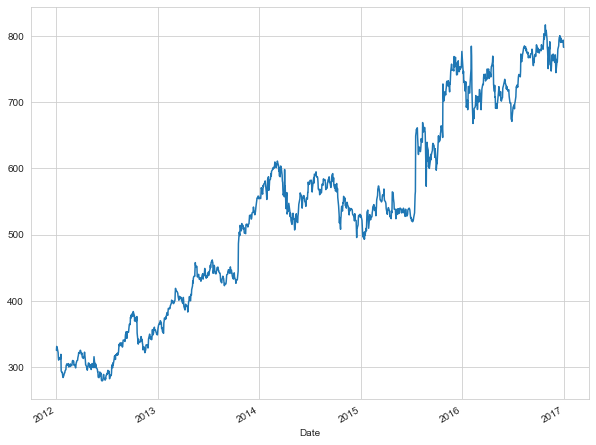

In [8]:
stock['Open'].plot(figsize=(10,8))

# NOW DATA PREPROCESSING

In [10]:
stock.isnull().sum()

Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [11]:
stock.corr()

,Open,High,Low,Close,Volume
Open,1.000000,0.999692,0.999498,0.125832,-0.530506
High,0.999692,1.000000,0.999480,0.124351,-0.526936
Low,0.999498,0.999480,1.000000,0.129001,-0.538273
Close,0.125832,0.124351,0.129001,1.000000,0.192357
Volume,-0.530506,-0.526936,-0.538273,0.192357,1.000000


<AxesSubplot:>

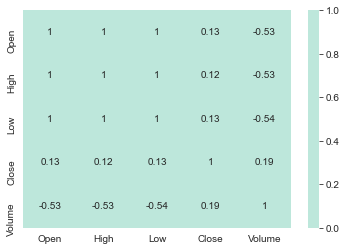

In [12]:
sn.heatmap(stock.corr(),vmin=1,vmax=0,center=0,annot=True)

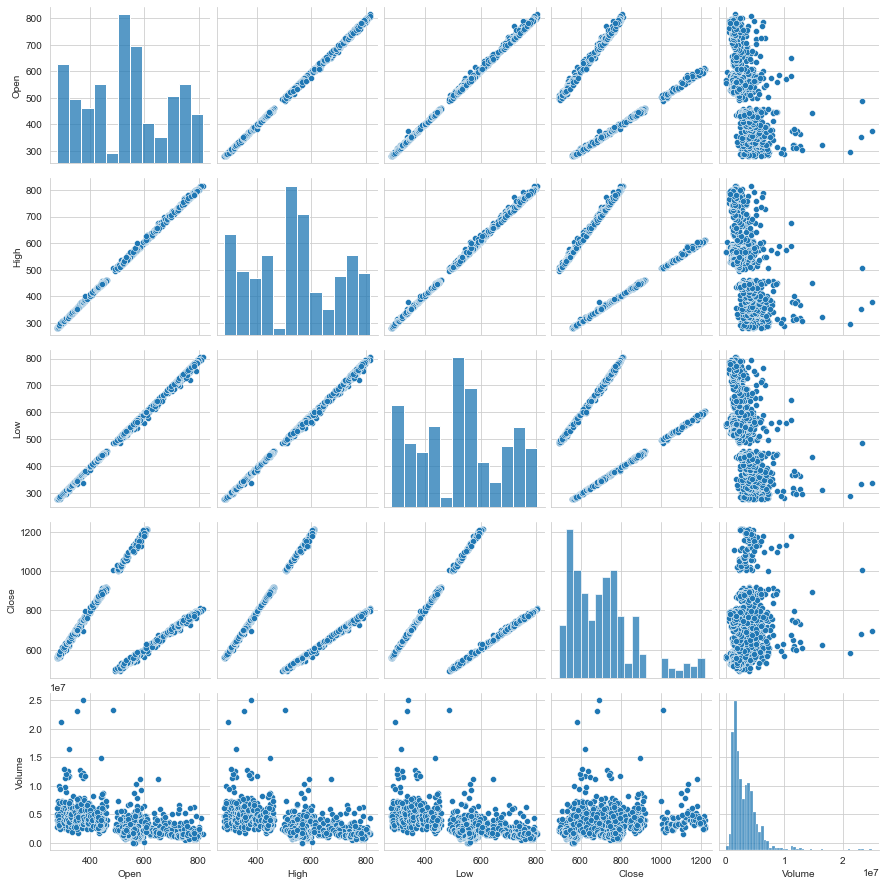

In [13]:
sn.pairplot(stock)

In [14]:
#to build a linear regrtession model we have to give features and target
#features:DATE,OPEN,HIGH
#target:Volume

In [15]:
import sklearn
from sklearn.model_selection import train_test_split

In [16]:
data=stock

In [17]:
x=data[['Open','High','Low']]
y=data['Volume']

In [18]:
len(x),len(y)

(1258, 1258)

In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [20]:
len(x_train),len(y_train)

(880, 880)

In [21]:
len(x_test),len(y_test)

(378, 378)

In [22]:
x_train.shape,x_test.shape

((880, 3), (378, 3))

In [23]:
x_train

,Open,High,Low
Date,,,
2015-04-15,527.25,533.27,521.79
2015-08-05,634.33,647.86,633.16
2014-04-24,528.62,530.19,520.69
2013-06-20,445.33,448.82,440.01
2014-06-16,547.76,548.12,540.04
...,...,...,...
2015-01-15,504.19,504.30,496.40
2015-04-30,547.87,548.59,535.05
2016-11-01,782.89,789.49,775.54


In [24]:
y_train.shape,y_test.shape

((880,), (378,))

In [25]:
y_train

Date
2015-04-15    2318800.0
2015-08-05    2334300.0
2014-04-24    1883100.0
2013-06-20    6769200.0
2014-06-16    1702500.0
                ...    
2015-01-15    2715800.0
2015-04-30    2082200.0
2016-11-01    2406400.0
2014-03-26    5179200.0
2014-09-23    1471400.0
Name: Volume, Length: 880, dtype: float64

In [26]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

reg=linear_model.LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [27]:
y_pred=reg.predict(x_test)

In [28]:
y_pred

array([5390560.86404374, 2707434.32358326, 5405570.15787178,
       1992381.76558876, 4229908.63864223, 4816568.93551652,
       4560241.55992663, 2139676.47987388, 3628293.8698342 ,
       3946621.36180635, 2894387.58589678, 2907045.75535582,
       3549454.82016291, 2769314.91362959, 3426868.73126643,
        608159.9408236 , 3430002.47386965,  128625.94036633,
       5033014.52746386,   -9083.76539513, 3535182.58973955,
       4956704.33401009, 2906891.93286103, 2689196.39071   ,
       -324038.97627844, 4635972.33007811, 2766607.01998699,
       4011825.02782184, 3443218.83264272, 2031459.52684704,
       4991412.2964864 , 2276808.02204929, 1392085.11539453,
       4526863.10008906, 3045832.42280051, 3745197.1747765 ,
       3184743.19825216,  577431.16033665, 2974667.91439457,
       3518455.23505693, 4026282.96176025, 1381980.20707396,
       5668745.55409457,  206736.36151824,  701907.93014026,
       4616258.66975951, 1605255.96732837, 2357189.15923694,
       4785775.78911994,

In [29]:
from sklearn import metrics

In [30]:
from sklearn.metrics import r2_score#to check the accuracy

In [31]:
r2_score=(y_test,y_pred)

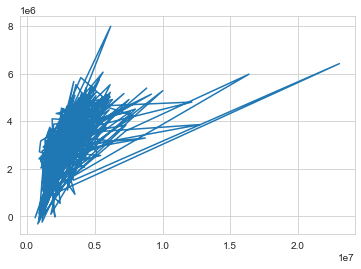

In [32]:
plt.plot(y_test,y_pred)
